# Smoothing Images


2D Convolution ( Image Filtering )
As in one-dimensional signals, images also can be filtered with various low-pass filters(LPF), high-pass filters(HPF) etc. LPF helps in removing noises, blurring the images etc. HPF filters helps in finding edges in the images.

OpenCV provides a function <b>cv2.filter2D()</b> to convolve a kernel with an image. As an example, we will try an averaging filter on an image. A 5x5 averaging filter kernel will look like below:

K = \frac{1}{25} \begin{bmatrix} 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \\ 1 & 1 & 1 & 1 & 1 \end{bmatrix}

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
img=cv2.imread('assets/logo2.png')

### Using an Averaging Kernal to produce a Blur Effect

In [4]:
#Creating a kernal
ker=np.ones((5,5),np.float32)/25

In [6]:
#Convolving the kernal over the image
dst=cv2.filter2D(img,-1,ker)

Original


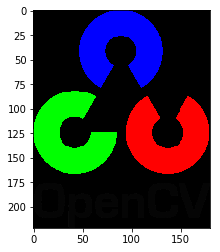

Averaged


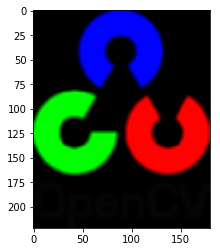

In [10]:
print('Original')
plt.imshow(img)
plt.show()
print('Averaged')
plt.imshow(dst)
plt.show()

## Image Blurring (Image Smoothing)

Image blurring is achieved by convolving the image with a low-pass filter kernel. It is useful for removing noises. It actually removes high frequency content (eg: noise, edges) from the image. So edges are blurred a little bit in this operation. (Well, there are blurring techniques which doesn't blur the edges too). OpenCV provides mainly four types of blurring techniques.

* <b>Averaging</b> 

* <b>Gaussian Blurring</b>

* <b>Median Blurring</b>

* <b>Bilateral Filtering</b>

### 1. Averaging 

This is done by convolving image with a normalized box filter. It simply takes the average of all the pixels under kernel area and replace the central element.Similar to what was done above.

This is done by the function <b>[cv2.blur()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#ga8c45db9afe636703801b0b2e440fce37)</b> or <b>[cv2.boxFilter()](https://docs.opencv.org/3.1.0/d4/d86/group__imgproc__filter.html#gad533230ebf2d42509547d514f7d3fbc3)</b>

(<matplotlib.axes._subplots.AxesSubplot at 0x7fabac9c77f0>,
 Text(0.5, 1.0, 'cv2.boxFilter()'))

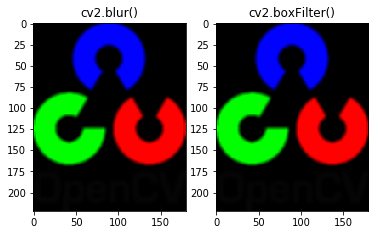

In [36]:
br=cv2.blur(img,(5,5))
#print('')
plt.subplot(121),plt.imshow(br),plt.title('cv2.blur()')
br=cv2.boxFilter(img,-1,(5,5),br)
plt.subplot(122),plt.imshow(br),plt.title('cv2.boxFilter()')


### 2. Gaussian Blurring

In this, instead of box filter, gaussian kernel is used. It is done with the function, cv2.GaussianBlur(). We should specify the width and height of kernel which should be positive and odd. We also should specify the standard deviation in X and Y direction, sigmaX and sigmaY respectively. If only sigmaX is specified, sigmaY is taken as same as sigmaX. If both are given as zeros, they are calculated from kernel size. Gaussian blurring is highly effective in removing gaussian noise from the image.

If you want, you can create a Gaussian kernel with the function, <b>cv2.getGaussianKernel()<b>

The above code can be modified for Gaussian blurring:



(<matplotlib.axes._subplots.AxesSubplot at 0x7fabac8fc160>,
 Text(0.5, 1.0, 'cv2.GaussianBlur()'))

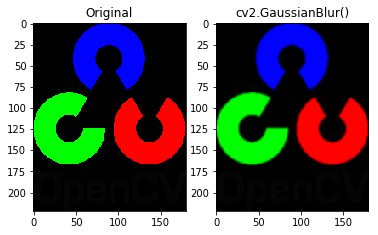

In [37]:
br = cv2.GaussianBlur(img,(5,5),0)
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.subplot(122),plt.imshow(br),plt.title('cv2.GaussianBlur()')


## Median Blur

Here, the function <b>cv2.medianBlur()</b> takes median of all the pixels under kernel area and central element is replaced with this median value. This is highly effective against salt-and-pepper noise in the images. Interesting thing is that, in the above filters, central element is a newly calculated value which may be a pixel value in the image or a new value. But in median blurring, central element is always replaced by some pixel value in the image. It reduces the noise effectively. Its kernel size should be a <b>positive odd integer</b>.

In [92]:
noisy_img=cv2.imread('assets/noisy.jpeg')


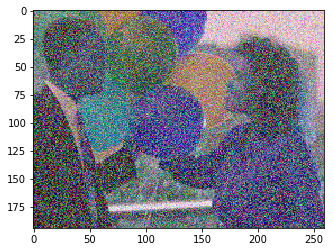

In [93]:
plt.imshow(noisy_img)

In [94]:
res=cv2.medianBlur(noisy_img,5)

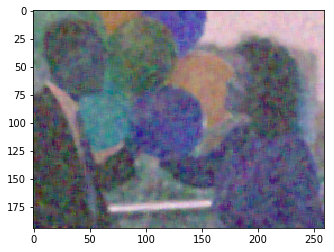

In [95]:
plt.imshow(res)

## 4.Bilateral Filtering


Bilateral filter also takes a gaussian filter in space, but one more gaussian filter which is a function of pixel difference. Gaussian function of space make sure only nearby pixels are considered for blurring while gaussian function of intensity difference make sure only those pixels with similar intensity to central pixel is considered for blurring. So it preserves the edges since pixels at edges will have large intensity variation.



In [109]:
img=cv2.imread('assets/img.jpeg',0)
br=cv2.bilateralFilter(img,5,20,20)

(<matplotlib.axes._subplots.AxesSubplot at 0x7faba8e35940>,
 Text(0.5, 1.0, 'BilateralFilter'))

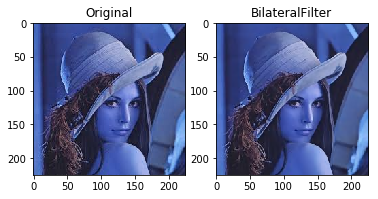

In [115]:
plt.subplot(121),plt.imshow(img,cmap='gray'),plt.title('Original')
plt.subplot(122),plt.imshow(br,cmap='gray'),plt.title('BilateralFilter')


# END